# Mencari Station Favorit Berdasarkan PageRank dan Perhitungan Luas Area Lingkup Station dengan Integal di San Fransisco

Nama: Ikhbar Firman Hanafi

Batch: 14

Phase: 0

### Objective
1. Mencari station favorit di San Fransisco berdasarkan trips sepeda tiap station
2. Mencari luas area lingkup station di San Fransisco.

### Problem Statement

Untuk mempermudah pengunjung stasiun ke lokasi tujuan di San Fransisco diberlakukanlah 'bikeshare' pada sejumlah stasiun. Tiap stasiun mungkin memiliki jumlah dan kualitas sepeda yang berbeda. Jarak dari tiap station maupun ke lokasi tujuan orang berbeda-beda. Beberapa hal tersebut dapat mempengaruhi optimalisasi bikeshare stasiun di San Fransisco.

Sebagai seorang data scientist di San Francisco Smart City, saya ditugaskan dalam  proyek untuk menganalisa dan mengoptimasi sistem pesepedaan. Secara spesifik tugas yang saya lakukan disini adalah mencari stasiun awal mana yang paling favorit di antara stasiun-stasiun lainnya dan menari luas area lingkup stasiun di San Fransisco.

#### Batasan Masalah:
1. Penelitian ini hanya berdasarkan data trip pengunjung stasiun yang didapat dari database San Fransisco bikeshare selama 5 bulan dari akhir tahun 2017.
2. Analisa disini tidak memperhitungkan faktor-faktor lain pada tiap stasiun seperti jumlah sepeda, kualitas sepeda, karakteristik pengunjung, dan sebagainya.

### Deskripsi data
Data yang digunakan disini didapat dari database 'san_francisco_bikeshare' menggunakan bigquery-public-data pada Google Cloud Big Query dengan kriteria sebagai berikut:
1. Hanya terdapat kolom trip_id, start_date, start_station_name, end_station_name, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude pada tabel san_francisco_bikeshare.bikeshare_trips, dan region_id pada tabel bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info.
2.  Nilai start_station_name tidak boleh sama dengan end_station_name
3. Kolom start_station_latitude, start_station_longitude, end_station_latitude, dan end_station_longitude tidak boleh ada nilai null
4. Pilih start_date dengan rentang tanggal lahir di tahun 2017 sampai 5 bulan berikutnya, dimana tanggal lahir yang digunakan adalah 27 Desember.

Berikut ini adalah query yang digunakan untuk mengambil data di Google Cloud Platform:

SELECT t.trip_id, 
  t.start_date, 
  t.start_station_name, 
  t.end_station_name, 
  t.start_station_latitude, 
  t.start_station_longitude, 
  t.end_station_latitude, 
  t.end_station_longitude,
  si.region_id
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` t
JOIN `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info` si
  ON t.start_station_name = si.name
WHERE t.start_station_name != t.end_station_name AND 
  t.start_station_latitude IS NOT NULL AND
  t.start_station_longitude IS NOT NULL AND
  t.end_station_latitude IS NOT NULL AND 
  t.end_station_longitude IS NOT NULL AND 
  t.start_date BETWEEN '2017-12-27' AND '2018-05-27';

Data tersebut telah disimpan dalam format csv dengan nama file 'h8dsft_P0GC2_Set_1_ikhbar firman.csv'.

#### Load data dan membuat DataFrame dari file data CSV.

Pertama kita akan ubah data yang kita punya menjadi DataFrame dengan 'pandas'

In [40]:
import pandas as pd

In [41]:
data = pd.read_csv('h8dsft_P0GC2_Set_1_ikhbar_firman.csv')

#### Apakah data telah sesuai dengan kriteria ?

In [42]:
# Cek apakah terdapat data yang sama pada 'start_station_name' dan 'end_station_name'.
sum(data['start_station_name'] == data['end_station_name'])

0

Terlihat bahwa tidak ada data yang sama pada pada 'start_station_name' dan 'end_station_name'.

Cek apakah terdapat null pada kolom start_station_latitude, start_station_longitude, end_station_latitude, dan end_station_longitude.

In [43]:
data.isnull().any()

trip_id                    False
start_date                 False
start_station_name         False
end_station_name           False
start_station_latitude     False
start_station_longitude    False
end_station_latitude       False
end_station_longitude      False
region_id                  False
dtype: bool

Cek apakah data kolom start_date sesuai dengan rentang tanggal lahir di tahun 2017 sampai 5 bulan berikutnya.

In [44]:
sum((data['start_date'] < '2018-05-27') & (data['start_date'] > '2017-12-27')) ==  len(data)

True

Kita coba tampilkan 5 baris awal dan 5 baris akhir pada data.

In [45]:
# Menampilkan data 5 baris awal
data.head()

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
0,4682018040417544600,2018-04-04 17:54:46 UTC,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
1,37012018020216111700,2018-02-02 16:11:17 UTC,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
2,7542018030115182200,2018-03-01 15:18:22 UTC,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
3,28402018011713490700,2018-01-17 13:49:07 UTC,Mosswood Park,Snow Park,37.824931,-122.260479,37.807813,-122.264496,12
4,14642017123120575800,2017-12-31 20:57:58 UTC,45th St at Manila,Snow Park,37.833294,-122.256224,37.807813,-122.264496,12


In [46]:
# Menampilkan data 5 baris terakhir
data.tail()

,trip_id,start_date,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,region_id
394002,5942018022017111000,2018-02-20 17:11:10 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
394003,8482018022114062900,2018-02-21 14:06:29 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
394004,33282018030208243700,2018-03-02 08:24:37 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
394005,24212018033013042600,2018-03-30 13:04:26 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3
394006,28142018030913045200,2018-03-09 13:04:52 UTC,Yerba Buena Center for the Arts (Howard St at ...,Civic Center/UN Plaza BART Station (Market St ...,37.784872,-122.400876,37.781074,-122.411738,3


## Mencari Station Favourite di San Fransisco
Tugas pertama yang akan dilakukan adalah mencari stasiun awal mana yang paling favorit di antara stasiun-stasiun lainnya dengan menghitung PageRank menggunakan Eigendecomposition.

Adapun langkah-langkah dalam mencapai tujuan tersebut adalah sebagai berikut:

#### 1. Membuat dua variable baru yang bernama start_stations dan end_stations yang masing-masing berisikan list nama stasiun awal dan stasiun akhir, dimana tidak ada nama stasiun yang duplikat di masing-masing variable.

In [47]:
awal_stasiun = data['start_station_name'].unique()
akhir_stasiun = data['end_station_name'].unique()

#### 2. Deteksi stasiun-stasiun yang hanya terdapat di salah satu variable dan tidak di keduanya (exclusive-or/xor) menggunakan np.setxor1d(array1,array2). 
Outputnya akan berupa numpy array dan masukkan output tersebut ke dalam variable bernama exclusive_stations.

Dalam analisa selanjutnya kita akan banyak berurusan dengan array, maka pertama kita import library 'Numpy'.

In [48]:
import numpy as np

Membuat suatu array dimana hanya terdapat nama station di 'awal_stasin' dan 'akhir_stasiun' tapi tidak keduanya dengan numpy.setxor.

In [49]:
exclusive_stations = np.setxor1d(awal_stasiun,akhir_stasiun)

#### 3. Buat dataframe yang berisikan cross-tabulation antara start_stations dan end_stations menggunakan pd.crosstab(pd.   Series1,pd.Series2). Hasil dari langkah ini akan menghasilkan dataframe yang menginfokan berapa jumlah/frekuensi perjalanan dari start station tertentu ke end station tertentu. Hasil dari langkah ini dimasukkan ke dalam variable bernama df_matrix.

In [50]:
df_matrix = pd.crosstab(data['start_station_name'],data['end_station_name'])

#### 4. Membuat salinan dari data yang di-load ke dalam variable bernama df_copy.

In [51]:
df_copy  = data.copy()

#### 5.Filter df_copy dimana tidak ada start_station_name dan end_station_name yang termasuk dalam list exclusive_stations.

In [52]:
# Membuat filter dimana tidak ada start_station_name dan end_station_name yang termasuk dalam list exclusive_stations.
filter_1 = ~df_copy['start_station_name'].isin(exclusive_stations)
filter_2 = ~df_copy['end_station_name'].isin(exclusive_stations)
filter_add = filter_1 & filter_2

Filter tersebut juga dapat dibuat dengan menggunakan irisan atau intersection 'awal_stasiun' dan 'akhir_stasiun' sebagai dengan **numpy.intersect1d** sebagai berikut:

In [53]:
#intersect_station = np.intersect1d(awal_stasiun,akhir_stasiun)
#pilter_add = (df_copy['start_station_name'].isin(irisan)) & (df_copy['end_station_name'].isin(intersect_station))

Menerapkan filter terhadap DataFrame df_copy.

In [54]:
df_copy = df_copy[filter_add]

#### 6. Membuat dataframe yang berisikan cross-tabulation antara start_stations dan end_stations pada df_copy.

In [55]:
df_matrix_square = (pd.crosstab(df_copy['start_station_name'],df_copy['end_station_name']))

Cek size 'df_matrix_square'..Apakah sebuah matriks persegi (jumlah baris dan kolom sama)?

In [56]:
df_matrix_square.shape

(259, 259)

#### 7. Jumlahkan nilai kolom masing-masing rows pada df_matrix_square menggunakan method sum(axis=1) dan simpan ke dalam variable bernama total_trips.

Kita akan mencari jumlah total kolom pada tiap barisnya.

In [57]:
total_trips = df_matrix_square.sum(axis=1)

#### 8. Bagi setiap kolom df_matrix_square dengan menggunakan method .div(), dengan inputan parameter total_trips dan axis='rows'. Masukkan hasilnya ke variable weighted_matrix_df.

In [58]:
# Membagi tiap elemen pada baris 'df_matrix_square' dengan total tiap barisnya.
weighted_matrix_df = (df_matrix_square.div(total_trips, axis='rows'))

#### 9. Konversikan weighted_matrix_df ke numpy array

In [59]:
# Mengubah DataFrame 'weighted_matrix_df' menjadi array/marix dengan nama 'weighted_matrix_arr'
weighted_matrix_arr = weighted_matrix_df.to_numpy()

#### 10. Hitung eigen value dan eigen vector menggunakan library numpy

In [60]:
eig_value,eig_vec =np.linalg.eig(weighted_matrix_arr)

In [61]:
eig_vec

array([[ 9.49279227e-02+0.j, -6.71156055e-02+0.j,  7.37244570e-02+0.j,
        ...,  2.57224804e-14+0.j, -1.51972420e-15+0.j,
         2.03622094e-16+0.j],
       [ 9.49344957e-02+0.j, -6.71156055e-02+0.j,  7.11255559e-02+0.j,
        ..., -6.16289997e-16+0.j,  5.69796344e-17+0.j,
         5.37641447e-18+0.j],
       [-4.67566973e-03+0.j, -6.71156055e-02+0.j,  4.47503652e-06+0.j,
        ..., -7.11902723e-16+0.j, -1.96470214e-16+0.j,
         3.93817957e-15+0.j],
       ...,
       [-2.50823842e-36+0.j, -3.45207257e-35+0.j,  3.54237342e-30+0.j,
        ...,  3.14315657e-01+0.j,  4.11297475e-02+0.j,
         1.28887515e-01+0.j],
       [ 9.48156570e-02+0.j, -6.71156055e-02+0.j, -1.22258036e-01+0.j,
        ..., -6.76170958e-16+0.j,  4.40763159e-16+0.j,
        -9.49952233e-16+0.j],
       [-4.67523852e-03+0.j, -6.71156055e-02+0.j,  3.08992161e-06+0.j,
        ...,  4.48437679e-16+0.j,  4.26088787e-16+0.j,
        -3.90333086e-15+0.j]])

In [62]:
eig_value

array([ 9.99650225e-01+0.j        ,  1.00000000e+00+0.j        ,
        8.76567688e-01+0.j        ,  7.82505881e-01+0.j        ,
       -7.25084151e-01+0.j        ,  6.95686108e-01+0.j        ,
        6.41208322e-01+0.j        ,  1.00000000e+00+0.j        ,
       -6.01273998e-01+0.j        ,  5.75724377e-01+0.j        ,
       -5.44710662e-01+0.j        , -5.05171843e-01+0.j        ,
        4.81047128e-01+0.j        ,  4.71820963e-01+0.j        ,
        4.30437427e-01+0.j        , -4.33542008e-01+0.j        ,
        4.47289606e-01+0.j        ,  3.48538667e-01+0.j        ,
        3.49386414e-01+0.j        ,  3.32626163e-01+0.j        ,
       -4.04994146e-01+0.j        ,  3.62250287e-01+0.j        ,
        2.91892562e-01+0.j        ,  2.71510571e-01+0.j        ,
        2.99392006e-01+0.j        , -3.60022387e-01+0.j        ,
       -4.12818354e-01+0.j        , -3.38446252e-01+0.j        ,
       -3.84264901e-01+0.j        , -3.16707946e-01+0.j        ,
       -3.02196976e-01+0.

Terdapat eigenvalues dan element eigenvector yang merupakan bilangan kompleks, untuk itu kita akan mencari nilai modulus atau argument dari eigenvalue.
Modulus dari suatu bilangan kompleks $z = a+ib$ adalah $r=\sqrt{a^2+b^2} $. Untuk mencari modulus dari nilai eigenvalue dan eigenvector yang didapat kita dapat menerapkan 'numpy.abs'.

In [63]:
eig_value = np.abs(eig_value)
eig_vec = np.abs(eig_vec)

#### 11. Score PageRank terdapat pada eigen vector yang eigenvaluenya paling tinggi (mendekatai atau sama dengan 1). Simpan eigen vector tersebut ke dalam variable bernama PR_Scores.

Kita akan coba mencari eigenvector yang memiliki eigenvalue tertinggi.
Berdasarkan penjelasan dari numpy.org, bahwa numpy;linalg.eig menghasilkan eigenvector dimana:

"The normalized (unit “length”) eigenvectors, such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i]"

In [64]:
ind = eig_value.argmax() # Mengetahui indeks pada eigenvalue tertinggi
PR_scores = eig_vec[:,ind] # Mengetahui eigenvector dengan eigenvalue tertinggi

#### 12. Buat DataFrame baru bernama PageRank_df dengan kolom 'start_station' yang berisikan value variable start_stations dan kolom score yang berisikan value variable PR_Scores.

In [65]:
# Membuat DataFrame baru 'PageRank_df' dengan dictionary
PageRank_df = pd.DataFrame({'start_station':df_matrix_square.index,'PR_Scores':PR_scores})

#### 13. Tampilkan head dari dataframe PageRank_df

In [66]:
PageRank_df.head()

,start_station,PR_Scores
0,10th Ave at E 15th St,0.067116
1,10th St at Fallon St,0.067116
2,11th St at Bryant St,0.067116
3,11th St at Natoma St,0.067116
4,13th St at Franklin St,0.067116


####  a. Mengapa dalam kasus ini kita menerapkan konsep Eigendecomposition?

Misal $v$ merupakan vektor yang berisikan probability seseorang mengunjungi tiap station, dimana pada kasus ini $v\in \mathbb{R}^{259}$.
Matriks 'weighted_matrix_arr' berisikan probability suatu station dikunjungi dari station yang lain. Misal $A$ adalah matriks 'weighted_matrix_arr'. Apabila kita kalikan matriks $A$ terhadap $v$, $Av=v_1$, maka probability orang tersebut akan berubah dari $v$ menjadi $v_1$, yang mana tiap elemen $v_1$ mencerminkan probability baru orang tersebut terhadap tiap stasiun. Apabila kita kalikan lagi $A$ pada $v_1$, maka vektor probability orang tersebut akan terupdate menjadi $v_2$ atau dapat ditulis $A^2v=v_2$. Bila hal tersebut dilakukan terus-menerus $v$, $Av$, ..., $A^kv$ akan menuju suatu vektor $v^*$, dimana apabila kita kalikan lagi terhadap matriks $A$ vektor tersebut tidak lagi berubah. Atau dengan kata lain $Av^*=v^*$. Vektor $v^*$ tersebut merupakan PageRank vektor pada graf kasus station disini.

Dari hal tersebut kita dapat lihat bahwa $v^*$ merupakan eigenvector $A$ dengan eigenvalue $\lambda=1$.

Tentu akan memakan komputasi yang berat dan waktu yang lama untuk melakukan perkalian matriks $A^kv$, dimana $k$ sangat besar. Dengan konsep 'Eigendecomposition' suatu matriks persegi $A$ dapat difaktorkan menjadi $A=PDP^{-1}$, dimana $P$ suatu matriks persegi yang tiap kolomnya adalah eigenvector $A$, dan $D$ adalah matriks diagonal dengan elemen tiap diagonalnya adalah eigenvalue $A$. Dengan menerapkan eigendecomposition: $A^kv=PD^kP^{-1}v$ sehingga perkalian matriks menjadi jauh lebih mudah.

Atau dapat dituliskan menjadi $PD^kP^{-1}v=v^*$. Dari persamaan tersebut dapat dilihat bahwa hasil pada vektor PageRank $v^*$ didominasi oleh eigenvalue $\lambda$ terbesar beserta eigenvectornya. Sehingga kita bisa langsung dapat memprediksi station favorit berdasarkan eigenvector dengan eigenvalue tertinggi.

Sumber: http://pi.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture3/lecture3.html
        
        'MATHEMATICS FOR MACHINE LEARNING' by Marc Peter Deisenroth, A. Aldo Faisal, Cheng Soon Ong

        https://dm561.github.io/assets/dm561-pagerank.pdf

####  b. Dari pengamatanmu, mengapa pada akhirnya kita menggunakan dataframe df_matrix_square dibandingkan df_matrix untuk dilakukan proses Eigendecomposition? Berikan alasan yang logis sesuai dengan konsep Eigendecomposition.

Konsep Eigendecomposition hanya bisa diterapkan untuk matriks persegi $A$, dimana jumlah baris dan kolom adalah sama.

In [67]:
print(f'df_matrix memiliki ukuran {df_matrix.to_numpy().shape}')
print(f'df_matrix_square memiliki ukuran {weighted_matrix_arr.shape}')

df_matrix memiliki ukuran (259, 294)
df_matrix_square memiliki ukuran (259, 259)


Dapat dilihat bahwa 'df_matrix' memiliki jumlah baris dan kolom yang berbeda, sehingga 'df_matrix' tidak dapat diterapkan Eigendecomposition. Sedangkan 'df_matrix_square' dapat dijadikan mariks persegi yang mana dapat diterapkan Eigendecomposition.

#### c. Jika dilihat dari PageRanknya, dimana nilai PageRank paling besar merupakan stasiun yang paling favorit. Apa insight yang akan kamu berikan

Kita dapat mengetahui nilai PageRank terbesar dengan mengurutkan DataFrame PageRank_df berdasarkan PR_Scores dari yang terbesar ke terkecil.

In [68]:
PageRank_df.sort_values('PR_Scores', ascending=False)

,start_station,PR_Scores
114,Fruitvale BART Station,6.711561e-02
109,Foothill Blvd at Harrington Ave,6.711561e-02
21,23rd Ave at Foothill Blvd,6.711561e-02
108,Foothill Blvd at Fruitvale Ave,6.711561e-02
24,26th Ave at International Blvd,6.711561e-02
...,...,...
256,Willow St at Vine St,3.452073e-35
167,Mission St at 1st St,3.450222e-35
149,Locust St at Grant St,3.449213e-35
100,Empire St at 1st St,3.432686e-35


Atau kita dapat mencari nilai max PR_Score dan melihat station mana yang memiliki nilai tersebut.

In [69]:
max_score = PageRank_df['PR_Scores'].max() #Mencari maksimum PR_Score

PageRank_df[PageRank_df['PR_Scores'] == max_score] #Menampilkan stasiun beserta nilaiPR_Scores maksimum.

,start_station,PR_Scores
114,Fruitvale BART Station,0.067116


Berdasarkan nilai PR_Scores, **Fruitvale BART Station** memiliki PR_Score terbesar, yang dapat diambil kesimpulan sebagai station favorit.

Namun apabila kita lihat, nilai PR_Scores dari 'Fruitvale BART Station' tidak berbeda jauh dengan beberapa station PR_Scores sekitar 0.067116, yang mana bisa dilihat dari:

In [70]:
PageRank_df.sort_values('PR_Scores', ascending=False).head(10) #Menampilkan 10 data PR_Scores tertinggi

,start_station,PR_Scores
114,Fruitvale BART Station,0.067116
109,Foothill Blvd at Harrington Ave,0.067116
21,23rd Ave at Foothill Blvd,0.067116
108,Foothill Blvd at Fruitvale Ave,0.067116
24,26th Ave at International Blvd,0.067116
17,19th Street BART Station,0.067116
129,Hearst Ave at Euclid Ave,0.067116
25,27th St at MLK Jr Way,0.067116
58,Bay Pl at Vernon St,0.067116
224,Telegraph Ave at 27th St,0.067116


*Nampaknya kita tidak bisa secara pasti mengatakan bahwa 'Fruitvale BART Station' adalah station favorite berdasarkan hal tersebut.*

Kita juga dapat lebih memastikan dengan mencari vector $v^*$, dimana $v^*=A^kv$ dengan $k$ cukup besar. $A$ adalah matriks  stochastic (lebih tepatnya left stochastic matrix) dengan jumlah tiap baris pada suatu kolom adalah $1$, pada kasus kita disini $A$ adalah transpose dari 'weighted_matrix_arr'. Vektor $v$ adalah weighted vector ukuran $(259,)$. Kita akan cari vektor $v^*$ dengan $k$ yang sangat besar.

Terlebih dahulu kita coba bentuk matriks stochastic yaitu transpose dari weighted_matrix_arr, lalu kita cari eigenvalue dan eigenvectornya.

In [71]:
weighted_matrix_arr_t = weighted_matrix_arr.transpose() #Membentuk stochastic matrix
eigv_t,eigvec_t = np.linalg.eig(weighted_matrix_arr_t) #Mencari eigenvector dan eigenvalue dari stochastic matrix
lok = (np.abs(eigv_t)).argmax() #lokasi eigenvalue terbesar
eigvec_1 = (np.abs(eigvec_t))[:,lok] # Mencari eigenvector dengan eigenvalue terbesar
print(f'Elemen terbesar di eigenvector ada di posisi {eigvec_1.argmax()} sebesar') #lokasi elemen eigenvector terbesar

Elemen terbesar di eigenvector ada di posisi 199 sebesar


Berikutnya kita akan coba melakukan perkalian $A^kv$ dengan $k$ yang sangat besar sebagai berikut:

In [72]:
v = np.ones(259) #membuat vektor dengan distribusi yang sama untuk tiap station.
sum_v = v.sum()
v_weighted = (1/sum_v)*v #membuat vektor v dengan jumlah total elemennya adalah 1 atau probability sama untuk tiap station
v_ = (np.linalg.matrix_power(weighted_matrix_arr_t,10**19)) @ v_weighted #Mengkalikan A sebanyak 10^19 lalu dikalikan v_weighted
print(f'Elemen terbesar dari v_ ada di posisi {v_.argmax()}') # posisi

Elemen terbesar dari v_ ada di posisi 199


Kita bisa melihat bahwa posisi elemen terbesar dari eigenvector (dengan eigenvalue 1) sama dengan posisi elemen terbesar dari vektor hasil perkalian $A^{10^{20}}v$ yaitu 199. Stasiun yang berada di posisi tersebut (berdasarkan matriks df_matrix_square):

In [73]:
print(f'Station di posisi ke-199 adalah {PageRank_df.iloc[199,0]}')

Station di posisi ke-199 adalah San Fernando St at 4th St


Berdasarkan hal tersebut dapat kita lihat bahwa rank tertinggi adalah station **San Fernando St at 4th St**. Namun untuk lebih memastikan kita buat dataframe dengan nama station dan elemen eigenvector "eigvec_1" sebagai berikut.

In [74]:
pd.DataFrame({'start_station':df_matrix_square.index,'PR_Scores':eigvec_1}).sort_values('PR_Scores',ascending=False).head(3)

,start_station,PR_Scores
199,San Fernando St at 4th St,0.456667
205,San Jose Diridon Station,0.449495
211,San Salvador St at 9th St,0.305456


Terdapat station **San Jose Diridon Station** yang juga memiliki rank score yang hampir serupa dengan **San Fernando St at 4th St**.

*Saya menganggap bahwa akan lebih baik membentuk membentuk stochastic matrix left (pada langkah ke 7 dan 8) untuk dianalis dengan eigenvector dan eigenvalue terbesar $1$, sehingga dapat ditemukan score pagerank yang sesuai.*

Sumber: https://textbooks.math.gatech.edu/ila/stochastic-matrices.html

## Menghitung Luas Area Lingkup Sation di San Fransisco
Masih dengan proyek yang sama, namun tujuan kali ini adalah menghitung luas area lingkup stasiun awal sepeda di kota San Francisco dengan menerapkan integral. Adapun langkah-langkahnya sebagai berikut:

#### 1. Buat variable baru bernama df_coor_stations yang berisikan data yang sudah di-load dimana kolom region_id = 3. Pastikan tidak ada data yang duplikat dan hanya menyertakan kolom start_station_name,start_station_latitude, dan start_station_longitude. Urutkan pula dataframe tersebut berdasarkan start_station_longitude dari nilai terkecil hingga terbesar.

In [75]:
filter_region = data['region_id'] == 3
df_coor_stations = data[filter_region][['start_station_name','start_station_latitude','start_station_longitude']] #Menerapkan filter region
df_coor_stations.drop_duplicates(subset=['start_station_name'],inplace=True) #Menghilangkan duplikat berdasarkan nama station
df_coor_stations.sort_values('start_station_longitude', inplace=True) #Mengurutkan longitude dari yang terkecil
df_coor_stations

,start_station_name,start_station_latitude,start_station_longitude
768,McAllister St at Baker St,37.777416,-122.441838
792,O'Farrell St at Divisadero St,37.782405,-122.439446
718,Broderick St at Oak St,37.773063,-122.439078
727,Grove St at Divisadero,37.775946,-122.437777
814,Eureka Valley Recreation Center,37.759177,-122.436943
...,...,...,...
1830,The Embarcadero at Steuart St,37.791464,-122.391034
2681,Esprit Park,37.761634,-122.390648
710,Spear St at Folsom St,37.789677,-122.390428
1257,2nd St at Townsend St,37.780526,-122.390288


#### 2. Plot grafik area stasiun-stasiun di San Fransisco

Berikutnya kita akan coba plot berdasarkan titik-titik station (pada 'start_station_name') di San Fransisco dengan sumbu $x$ adalah 'start_station_longitude' dan sumbu $y$ adalah 'start_station_latitude'.

<AxesSubplot:xlabel='start_station_longitude'>

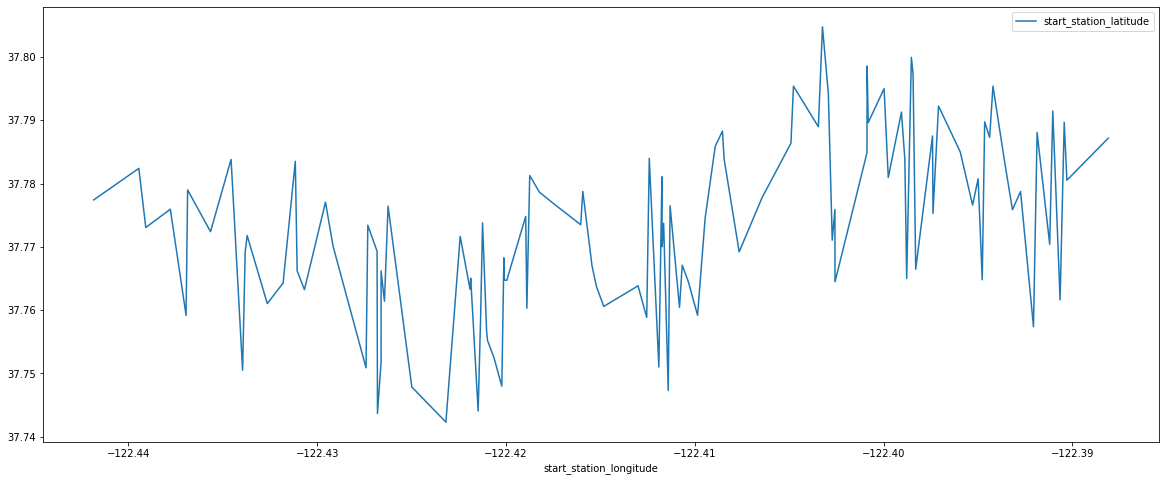

In [76]:
df_coor_stations.plot(x='start_station_longitude',y='start_station_latitude',figsize=(20,8))

#### 3. Hitung luas area yang dilingkup stasiun awal menggunakan library Scipy. Hasilnya bersatuan square degree.

Untuk menghitung luas area tersebut kita akan terapkan integral numerik dengan metode 'trapesium' pada libary 'Scipy'.

In [77]:
from scipy import integrate

Menggunakan method 'trapz' dengan nilai $y$ adalah 'start_station_lattitude' pada interval $x$ dari 'start_station_longitude'.

In [78]:
area = integrate.trapz(df_coor_stations['start_station_latitude'],df_coor_stations['start_station_longitude'])
print(f'Luas area yang dilingkup stasiun awal sebesar {round(area,2)} square degree. ')

Luas area yang dilingkup stasiun awal sebesar 2.03 square degree. 


#### a. Terdapat 2 jenis integral yaitu definite dan indefinite. Jenis integral apa yang kamu gunakan untuk kasus ini? Berikan alasanmu!

Jenis integral yang saya terapkan disini adalah integral **definite**. Hasil yang didapat dari integral definite berbentuk $\int_a^b \! f(x) \, \mathrm{d}x$ adalah luas yang dibatasi oleh kurva $f(x)$ dan sumbu $x$ dari $x=a$ (batas bawah) hingga $x=b$ (batas atas). Sedangkan apabila kita terapkan integral indefinite kita akan mendapatkan hasil berupa fungsi.

#### b. Terdapat dua metode dalam perhitungan integral yaitu simbolik dan numerik. Mana yang kamu gunakan untuk kasus ini dan mengapa?

Metode perhitungan integral yang digunakan dalam kasus ini adalah **integral numerik**. Karena nilai fungsi kita (station latitude) hanya terdapat di beberapa titik saja, kita tidak mengetahui ekspresi atau formula fungsi tersebut terhadap longitude. Namun kita bisa tetap memprediksi luas permukaan tersebut dengan integral numerik, salah satunya adalah metode trapesium, dimana perkiraan luas adalah total luas trapesium-trapesium yang dibentuk berdasarkan titik-titik yang kita dapatkan dari data.

#### c. Apakah diperlukan mendefinisikan fungsi matematis (seperti $f(x) = x^2+2$) pada kasus ini? Berikan penjelasan dan alasanmu!

**Tidak PERLU**. Karena kita dapat memperkirakan luas dengan integral numerik yang mana tidak memerlukan ekspresi atau formula fungsi seperti contoh $f(x)=x^2+2$. Dengan berbagai metode matematika numerik seperti interpolasi polinomial dan sebagainya, kita bisa dapat mencari suatu ekspresi formula $f(x)$ dari titik-titik data, lalu setelahnya diterapkan integral simbolik definite untuk mencari luas tersebut. Namun hal tersebut akan memakan waktu lebih lama dan komputasi yang lebih berat.